# Store selection/prediction based on Annual Gross Turnover

In [3]:
import numpy as np
import pandas as pd
import os
# for rending maps
import folium
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import statistics

In [4]:
#Read the analytics csv file and store our dataset into a dataframe called "df"
df = pd.read_excel('Exercise_G.xlsx', sheet_name='2016-18')
df2=pd.read_excel('Exercise_G.xlsx',sheet_name='2019')


In [9]:
df2.dropna(inplace=True)

In [10]:
df.dropna(inplace=True)
df.shape


(4904, 21)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [13]:
X = df.iloc[:, 1:-1].values

In [14]:
print(scaler.fit(X))

MinMaxScaler()


In [15]:
X=(scaler.transform(X))

In [16]:
y = df.iloc[:, -1].values
y = y.reshape((y.shape[0], 1))

In [17]:
print(scaler.fit(y))

MinMaxScaler()


In [18]:
y=(scaler.transform(y))

In [20]:
X_test=df2.iloc[:, 1:-1].values
print(scaler.fit(X_test))
X_test=(scaler.transform(X_test))

MinMaxScaler()


In [21]:
y_test = df2.iloc[:, -1].values
y_test = y_test.reshape((y_test.shape[0], 1))

In [22]:
print(scaler.fit(y_test))
y_test=(scaler.transform(y_test))

MinMaxScaler()


# Linear Regression Model 

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
regressor = LinearRegression()

In [27]:
regressor.fit(X, y)

LinearRegression()

In [28]:
y_pred = regressor.predict(X_test)

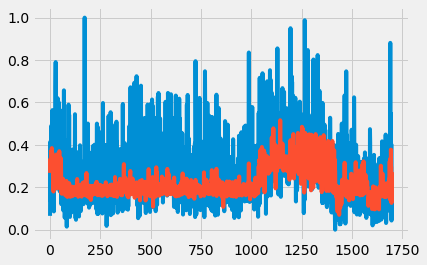

In [29]:
plt.plot(y_test)
plt.plot(y_pred)


In [72]:
print("Mean absolute error: %f" % abs(np.mean((regressor.predict(X_test) - y_test))))

Mean absolute error: 0.064079


# Random Forest Model

In [32]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

In [33]:
rf = RandomForestRegressor(n_estimators = 5000, random_state = 22)

In [34]:
rf.fit(X, y)

<ipython-input-34-81a7c6de9acf>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X, y)


RandomForestRegressor(n_estimators=5000, random_state=22)

In [35]:
predictions = rf.predict(X_test)

In [36]:
errors = abs(predictions - y_test)

In [37]:
print('Mean Absolute Error:', (np.mean(errors)))

Mean Absolute Error: 0.14893899108442477


In [38]:
pre = predictions.reshape((predictions.shape[0], 1))

In [39]:
Y_predicted_IT=scaler.inverse_transform(y_pred)

In [40]:
Y_test_IT=scaler.inverse_transform(y_test)

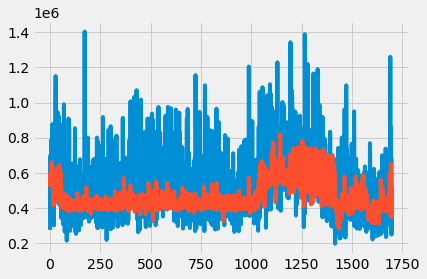

In [41]:
plt.plot(Y_test_IT)
plt.plot(Y_predicted_IT)

In [42]:
feature_list = list(df.columns)

# Variable Importance and parameter selection

In [45]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: 1km Food And Beveravge Spend Per Capita Importance: 0.22
Variable: Supermarkets within 500m Importance: 0.08
Variable: KmDist kik           Importance: 0.08
Variable: Km distance to supermarket Importance: 0.07
Variable: KmDist ernstings family Importance: 0.07
Variable: 1km Clothing Spend Per Capita Importance: 0.06
Variable: Store no             Importance: 0.04
Variable: Within 1km HHs in 1st Income Quintile Importance: 0.04
Variable: Within 1km HHs in 2nd Income Quintile Importance: 0.04
Variable: Within 1km HHs in 3rd Income Quintile Importance: 0.04
Variable: 1km Textiles Spend Per Capita Importance: 0.04
Variable: Within 1km HHs in 4th Income Quintile Importance: 0.03
Variable: Within 1km HHs in 5th Income Quintile Importance: 0.03
Variable: Household with 1km Purchasing Power Index Importance: 0.03
Variable: 1km Purchasing Power Per Capita Importance: 0.03
Variable: 1km Footwear Spend Per Capita Importance: 0.03
Variable: Competitors Within 10Km Importance: 0.03
Varia

In [46]:
temp_av=[np.mean(Y_predicted_IT)]*len(Y_predicted_IT)

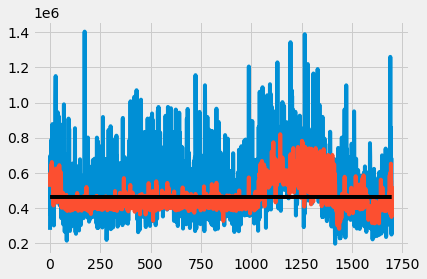

In [47]:
plt.plot(Y_test_IT)
plt.plot(Y_predicted_IT)
plt.plot(temp_av,'k-')

In [51]:
store_no=df2.iloc[:, 0]

In [52]:
Store_data=pd.DataFrame(store_no)
predicted_data=pd.DataFrame(Y_predicted_IT)

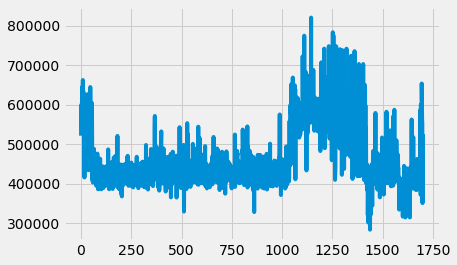

In [63]:
plt.plot(store_no.index,Y_predicted_IT)

In [54]:
frames = [Store_data, predicted_data, df2['Annual Total Gross Turnover*']]

In [55]:
result = pd.concat([Store_data, predicted_data,df2['Annual Total Gross Turnover*']], axis=1).dropna()

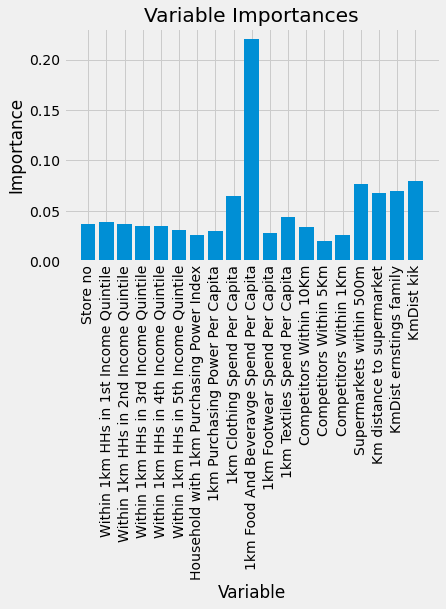

In [58]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
